In [2]:
import sys

In [15]:
sys.version

'3.7.0 (default, Jun 28 2018, 08:04:48) [MSC v.1912 64 bit (AMD64)]'

In [9]:
import os

In [10]:
%pwd

'c:\\Users\\HP\\Desktop\\cement_strength\\research'

In [11]:
os.chdir("..")

In [13]:
os.chdir('c:\\Users\\HP\\Desktop\\cement_strength\\research')

In [14]:
%pwd

'c:\\Users\\HP\\Desktop\\cement_strength\\research'

In [1]:
import pandas as pd

c:\Users\HP\Desktop\cement_strength\venv\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [2]:
df= pd.read_csv("concrete_data.csv")
df.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


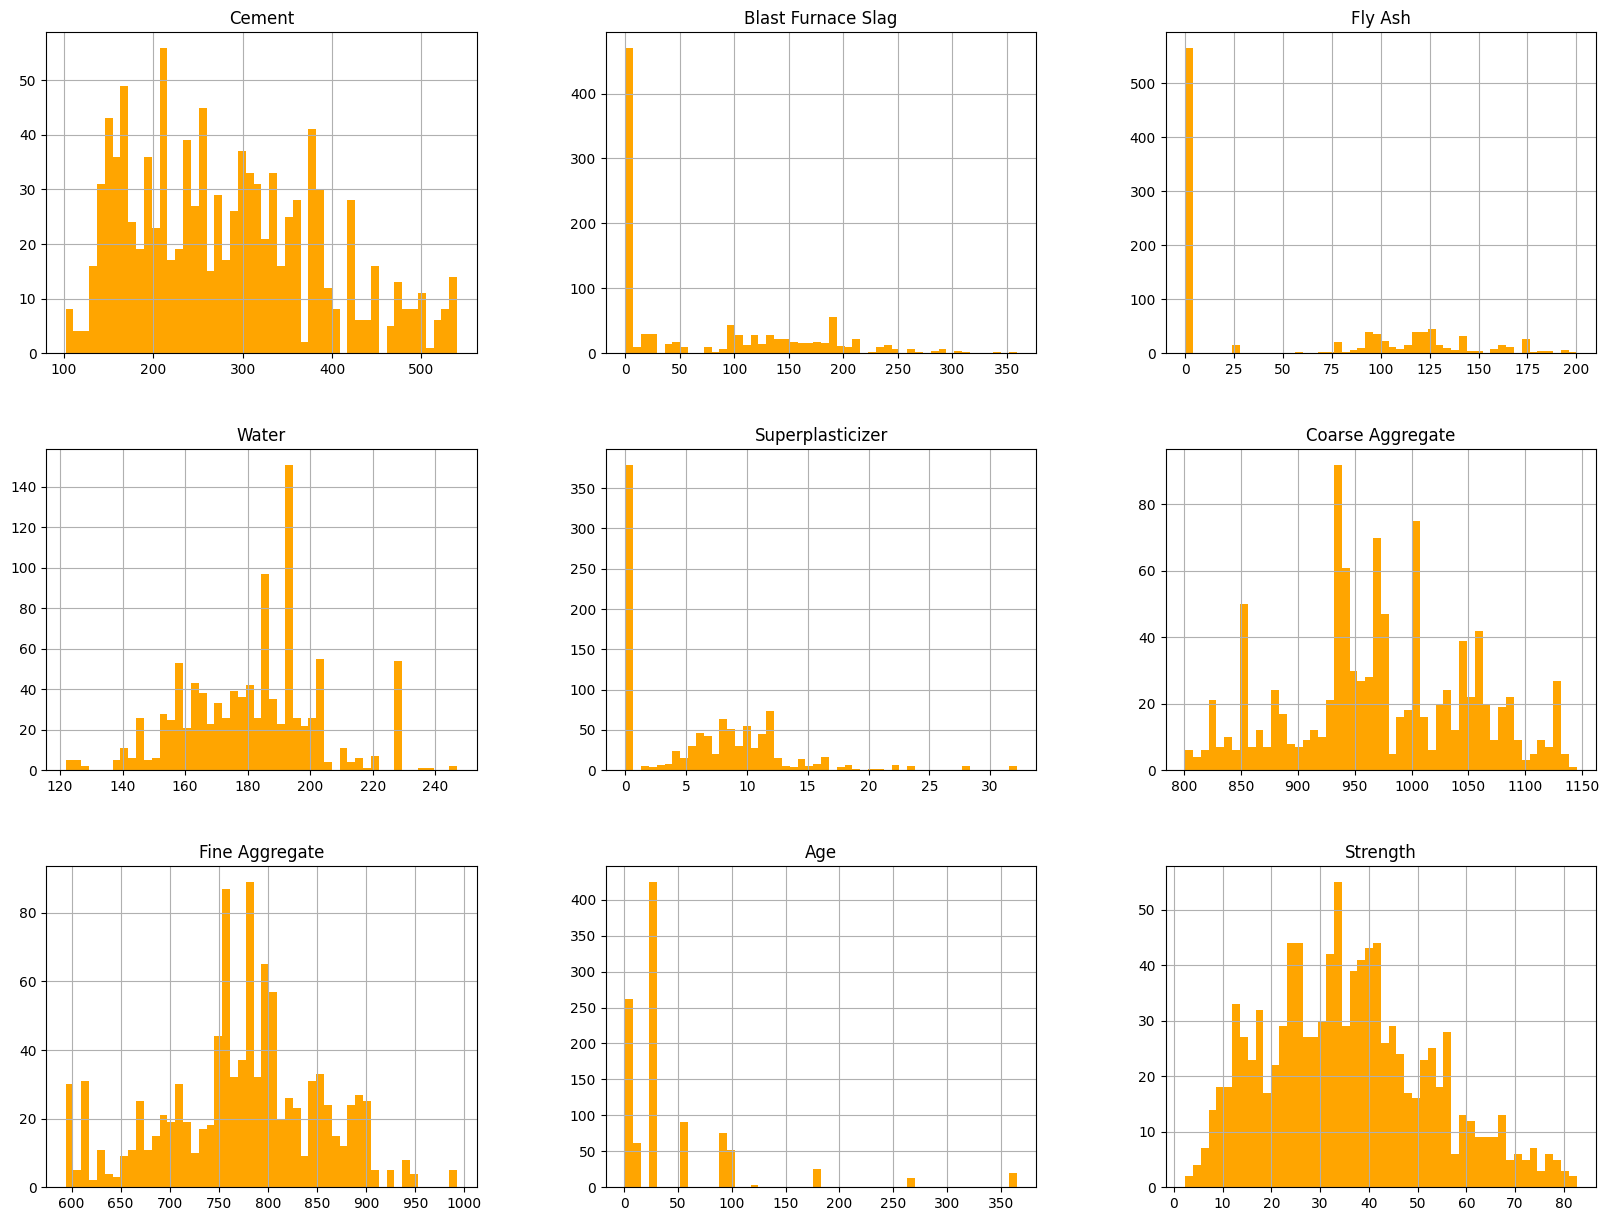

In [3]:
import matplotlib.pyplot as plt 

df.hist(bins=50, figsize=(20,15), color = "orange")
plt.show()

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
df.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [6]:
X = df.drop(['Strength'], axis=1)
y = df['Strength']

In [7]:
X.head(2)

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28


In [8]:
y.head(2)

0    79.99
1    61.89
Name: Strength, dtype: float64

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [10]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(824, 8)
(206, 8)
(824,)
(206,)


In [12]:
from sklearn.linear_model import ElasticNet

In [13]:
lr = ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42)
lr.fit(X_train, y_train)

ElasticNet(alpha=0.1, random_state=42)

In [14]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

In [15]:
def eval_metrics(actual, pred):
    rmse = np.sqrt(mean_squared_error(actual, pred))
    mae = mean_absolute_error(actual, pred)
    r2 = r2_score(actual, pred)

    return rmse, mae, r2

In [16]:
predicted_value = lr.predict(X_test)

In [17]:
predicted_value

array([59.65130297, 52.03042869, 63.49656828, 51.56477987, 17.22160147,
       39.87485641, 26.70584178, 44.72683653, 29.35577213, 38.20676293,
       27.75389188, 19.83217071, 66.82836543, 52.26965358, 29.98270867,
       44.48246064, 29.2317363 , 26.54472211, 31.9659809 , 32.02947402,
       36.83925833, 31.80224166, 38.06701222, 25.13382652, 33.10739637,
       33.84035435, 14.24338071, 40.32837392, 41.87420509, 21.34888578,
       35.73091403, 30.98920615, 43.88689613, 45.51871373, 30.76117892,
       29.59936054, 28.90276859, 38.85077474, 20.36380183, 38.44140225,
       21.17283823, 15.8998864 , 31.06876268, 50.69107194, 20.26177463,
       57.6370391 , 50.88072664, 60.9722726 , 20.0091044 , 19.2303735 ,
       40.49116527, 36.25216776, 30.01593135, 33.44198308, 46.67870164,
       51.46719217, 27.72600125, 15.70021736, 29.68050977, 18.12668079,
       38.63454736, 20.56185178, 31.55375863, 55.46046326, 22.94577046,
       21.32990606, 32.26953433, 16.70204398, 25.3970959 , 25.55

In [18]:
(rmse, mae, r2) = eval_metrics(y_test, predicted_value)

In [19]:
print("rmse = ", rmse)
print("mae = ", mae)
print("r2 = ", r2)

rmse =  9.79623526781998
mae =  7.7450929115585465
r2 =  0.627571476054871
